In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
from pylab import *
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.gridspec as gridspec 

In [4]:
#Import data
users = pd.read_csv("/Users/saurabh/Documents/PythonData/users.csv")
orders = pd.read_csv("/Users/saurabh/Documents/PythonData/orders.csv")

In [5]:
users.head()

,id,gender,age,country,days_on_site_in_2016
0,1,M,21,US,1
1,2,F,46,US,10
2,3,NaN,26,US,4
3,4,NaN,54,US,7
4,5,F,34,US,38


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
id                      10000 non-null int64
gender                  6690 non-null object
age                     10000 non-null int64
country                 10000 non-null object
days_on_site_in_2016    10000 non-null int64
dtypes: int64(3), object(2)
memory usage: 390.7+ KB


In [8]:
users.describe()

,id,age,days_on_site_in_2016
count,10000.00000,10000.00000,10000.000000
mean,5000.50000,37.57790,10.369800
std,2886.89568,9.83994,9.916132
min,1.00000,21.00000,1.000000
25%,2500.75000,29.00000,3.000000
50%,5000.50000,38.00000,7.000000
75%,7500.25000,46.00000,14.000000
max,10000.00000,54.00000,87.000000


In [6]:
orders.head()

,id,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject
0,1,9852,2016-01-01 0:03:11,60.69,10,NaN,False
1,2,2784,2016-01-01 0:09:32,123.91,15,NaN,False
2,3,1619,2016-01-01 0:17:26,119.75,15,NaN,False
3,4,9725,2016-01-01 0:44:04,151.92,15,NaN,False
4,5,8892,2016-01-01 0:52:23,153.27,15,NaN,False


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51738 entries, 0 to 51737
Data columns (total 7 columns):
id                   51738 non-null int64
user_id              51738 non-null int64
order_time           51738 non-null object
item_total           51738 non-null float64
shipping_cost        51738 non-null int64
discounts_applied    4300 non-null float64
payment_reject       51738 non-null bool
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 2.4+ MB


In [10]:
orders.describe()

,id,user_id,item_total,shipping_cost,discounts_applied
count,51738.000000,51738.000000,51738.000000,51738.000000,4300.0
mean,25869.500000,5006.494646,126.398776,13.994646,5.0
std,14935.618451,2890.480242,35.045324,3.941930,0.0
min,1.000000,2.000000,43.040000,10.000000,5.0
25%,12935.250000,2543.000000,100.750000,10.000000,5.0
50%,25869.500000,4973.000000,126.410000,15.000000,5.0
75%,38803.750000,7487.000000,152.047500,15.000000,5.0
max,51738.000000,10000.000000,222.960000,25.000000,5.0


In [15]:
df_new_users = users.dropna()

In [17]:
df_new_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6690 entries, 0 to 9999
Data columns (total 5 columns):
id                      6690 non-null int64
gender                  6690 non-null object
age                     6690 non-null int64
country                 6690 non-null object
days_on_site_in_2016    6690 non-null int64
dtypes: int64(3), object(2)
memory usage: 313.6+ KB


In [19]:
df_new_users.head()

,id,gender,age,country,days_on_site_in_2016
0,1,M,21,US,1
1,2,F,46,US,10
4,5,F,34,US,38
5,6,M,24,US,2
6,7,M,52,US,18


## What factors determine the shipping_cost amount?

Lets do some data analysis to find out what are the factors that can affect shipping cost amount

In [22]:
df = orders.groupby(['user_id'])['shipping_cost'].sum()

In [23]:
df.head()

user_id
2    110
3     30
4     30
5    195
6     10
Name: shipping_cost, dtype: int64

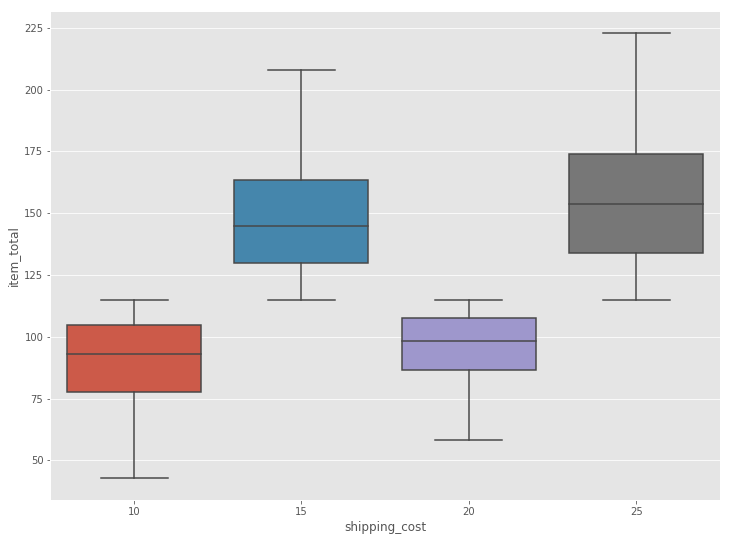

In [32]:
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.boxplot(x="shipping_cost", y="item_total", data=orders)

Above graph helps us to conclude that 
- Item_total cost is one of the factor which determine the shipping_cost amount 
- There are some overlaps in the amounts for shipping_cost 10 and 20 as well as 15 and 20. 
- The shipping_cost distribution looks like for amount between 
    - 43.04 - 114.99 the shipping_cost is 10
    - 115 - 207.94 the shipping_cost is 15
    - 58.22 - 114.99 the shipping_cost is 20
    - 115.02 - 222.96 the shipping_cost is 25
    

In [28]:
orders['shipping_cost'].value_counts()

15    28250
10    18739
25     3587
20     1162
Name: shipping_cost, dtype: int64

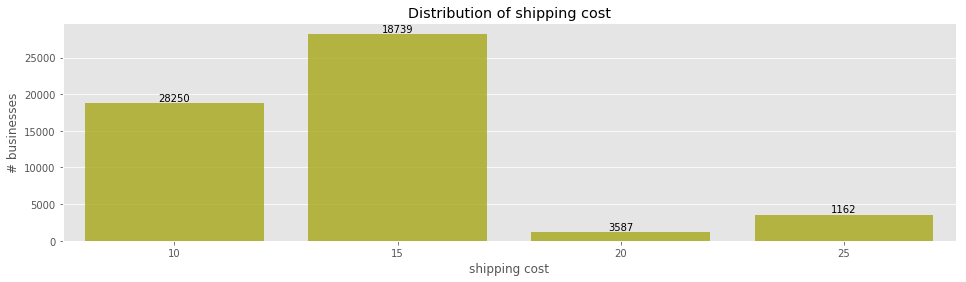

In [30]:
#Get the distribution of the ratings
x=orders['shipping_cost'].value_counts()
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color='y')
plt.title("Distribution of shipping cost")
locs, labels = plt.xticks()
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('shipping cost', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

The above graph shows 
- More business happened for shipping_cost 15 compared to others
- Less business happened for shipping_cost 20 compared to others

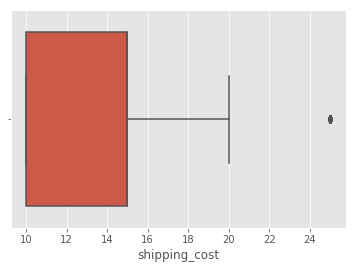

In [34]:
ax = sns.boxplot(x=orders["shipping_cost"])

In [44]:
temp_df = orders['user_id'].value_counts()
temp_df = temp_df[:10]

In [45]:
temp_df

2638    49
7420    45
6431    42
2954    42
5319    42
6790    41
1759    39
7984    38
7206    37
8472    36
Name: user_id, dtype: int64

In [53]:
temp=pd.concat([orders[orders['item_total'] > 58.22], orders[orders['item_total'] > 114.99]], axis=0).reset_index(drop=True)

In [69]:
new_df = temp.groupby(['user_id','shipping_cost']).sum()

In [72]:
new_df

id  item_total  discounts_applied  payment_reject
user_id shipping_cost                                                       
2       10              47008      211.80                5.0             0.0
        15             388848     1915.20               10.0             0.0
3       15             126288      489.46                0.0             0.0
4       15             100022      672.40                0.0             0.0
5       10             170600      855.59               15.0             0.0
        15             343100     2064.42               20.0             0.0
6       10               1268       96.27                0.0             0.0
7       15             181952     1414.96                0.0             0.0
9       20             123578      526.34                0.0             0.0
        25             535534     3539.88                0.0             2.0
10      10              64766      335.07                0.0             0.0
        15             441226     1676.44                0.0             0.0
11      10              85837      206.96                0.0             0.0
        15             383788     1553.70                0.0             0.0
13      10             188952      394.16                0.0             0.0
        15             393382     2804.60                0.0             0.0
14      10              41354       71.06                0.0             0.0
        15               4162      295.48                0.0             0.0
15      10              54391      225.78                5.0             0.0
16      15             224348     1883.76                0.0             0.0
17      10              61269      355.93                0.0             0.0
        15             286598     1502.04                0.0             0.0
18      15              52398      709.04                0.0             0.0
19      10              65739      305.05               10.0             0.0
        15              47842      281.92               10.0             0.0
20      10               3529       87.69                0.0             0.0
21      10              33385       67.75                0.0             0.0
22      10              61706      178.69                0.0             0.0
23      10             143151      385.46               10.0             0.0
        15              57428      606.64                0.0             0.0
...                       ...         ...                ...             ...
9982    15             107972      967.88                0.0             0.0
9983    15              84900      261.78                0.0             0.0
9984    10              46320      178.64                0.0             0.0
9985    10             197219      493.33                0.0             0.0
        15              73418      793.56                0.0             0.0
9986    10              70118      321.07                0.0             0.0
        15              72360      263.40                0.0             0.0
9987    15             296130     1539.34                0.0             0.0
9988    10             154004      613.84               10.0             0.0
        15             210126     1342.86               20.0             0.0
9989    10              85270      204.44                0.0             0.0
        15             596428     3129.98                0.0             0.0
9990    10             120502      370.02               10.0             0.0
        15             270626     2535.74               60.0             0.0
9991    10              42517       87.99                0.0             0.0
        15             121522      530.38                0.0             0.0
9992    15             169044     1043.62                0.0             0.0
9993    10              19331      104.30                0.0             0.0
        15             539432     3119.72                0.0             0.0
9994    10             

## Are there any trends in consumer behavior?

Lets do some analysis to find out different trends in consumer behavior

In [74]:
df_new_users.head()

,id,gender,age,country,days_on_site_in_2016
0,1,M,21,US,1
1,2,F,46,US,10
4,5,F,34,US,38
5,6,M,24,US,2
6,7,M,52,US,18


In [95]:
df_new_users.age.value_counts().head()

29    221
41    220
46    213
34    211
54    207
Name: age, dtype: int64

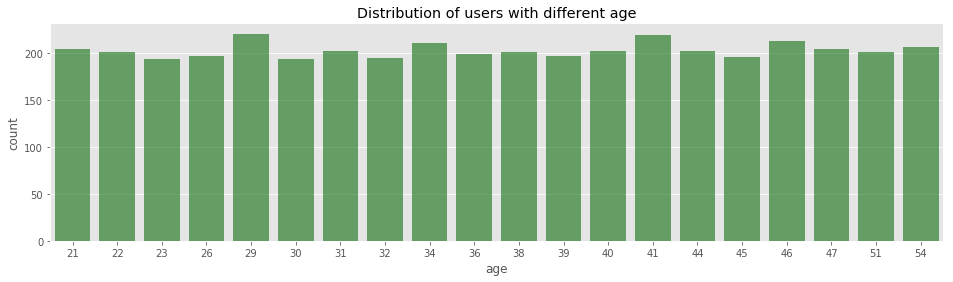

In [90]:
#Get the distribution of the ratings
x=df_new_users.age.value_counts()
plt.figure(figsize=(16,4))
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
ax = sns.barplot(x.index, x.values, alpha=0.6,color='g')
plt.title("Distribution of users with different age")
locs, labels = plt.xticks()
plt.ylabel('count', fontsize=12)
plt.xlabel('age', fontsize=12)

plt.show()

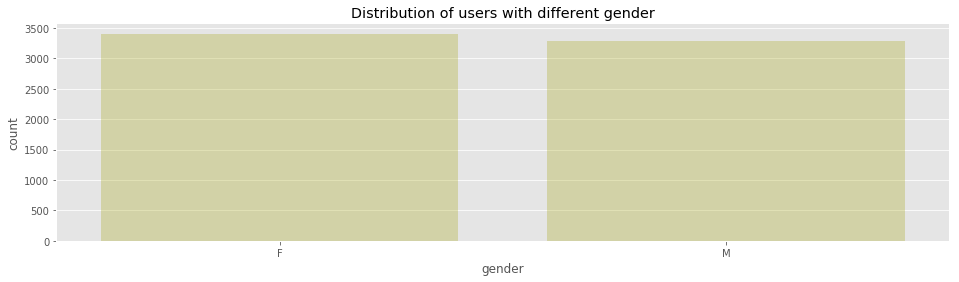

In [85]:
#Get the distribution of the ratings
x=df_new_users.gender.value_counts()
plt.figure(figsize=(16,4))
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
ax = sns.barplot(x.index, x.values, alpha=0.3,color='y')
plt.title("Distribution of users with different gender")
locs, labels = plt.xticks()
plt.ylabel('count', fontsize=12)
plt.xlabel('gender', fontsize=12)

plt.show()

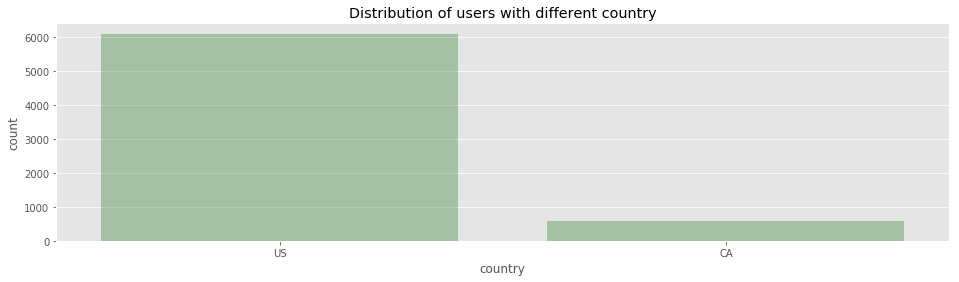

In [91]:
#Get the distribution of the ratings
x=df_new_users.country.value_counts()
plt.figure(figsize=(16,4))
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
ax = sns.barplot(x.index, x.values, alpha=0.3,color='g')
plt.title("Distribution of users with different country")
locs, labels = plt.xticks()
plt.ylabel('count', fontsize=12)
plt.xlabel('country', fontsize=12)

plt.show()

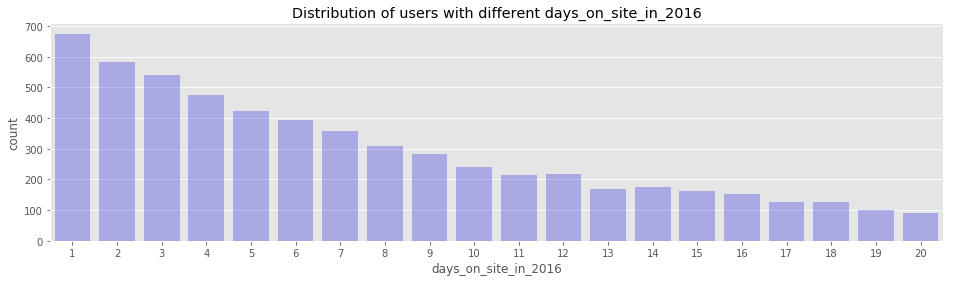

In [92]:
#Get the distribution of the ratings
x=df_new_users.days_on_site_in_2016.value_counts()
plt.figure(figsize=(16,4))
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
ax = sns.barplot(x.index, x.values, alpha=0.3,color='b')
plt.title("Distribution of users with different days_on_site_in_2016")
locs, labels = plt.xticks()
plt.ylabel('count', fontsize=12)
plt.xlabel('days_on_site_in_2016', fontsize=12)

plt.show()

Conclusions from users table :
- Consumers are from both age groups younger (29-35) as well as older(40-55)
- More Female consumers compared to male consumers
- Most of the consumers are from United states
- Most consumers are active on site for first day after that they started loosing interest or find something else better than this one